# Amazon Prime Titles Exploratory Data Analysis

---

## Introduction

**About Dataset** 

Amazon Prime is another one of the most popular media and video streaming platforms. They have close to 10000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Amazon Prime, along with details such as - cast, directors, ratings, release year, duration, etc.*



## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('amazon_prime_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [4]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [5]:
df.duplicated().sum()

0

Key takeaways :
* There are **9668** records and **12** features
* There are missing values on these features :
    * `director` : 2083 records
    * `cast` : 1233 records
    * `country` : 8996 records
    * `date_added` : 9513 records
    * `rating` : 337 records
* There are no duplicated records


In [6]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


## Data Cleaning

Drop column that has more than **80%** missing values.

In [7]:
percentage = (df.isnull().sum() / df.shape[0] * 100).round(2)
percentage

show_id          0.00
type             0.00
title            0.00
director        21.55
cast            12.75
country         93.05
date_added      98.40
release_year     0.00
rating           3.49
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

In [8]:
threshold = 80

index_clean = percentage[percentage < threshold].index 
df_cleaned = df[index_clean].copy()

In [9]:
df_cleaned.head()

,show_id,type,title,director,cast,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [10]:
df_cleaned.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

Impute other missing values with 'Unavailable'

In [11]:
df_cleaned.loc[:,'director'] = df_cleaned['director'].fillna('Unavailable')
df_cleaned.loc[:,'cast'] = df_cleaned['cast'].fillna('Unavailable')
df_cleaned.loc[:,'rating'] = df_cleaned['rating'].fillna('Unavailable')


In [12]:
df_cleaned.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## Data Visualizing

In [13]:
dfv = df_cleaned.copy()

**Movie and Tv Shows Ratio**

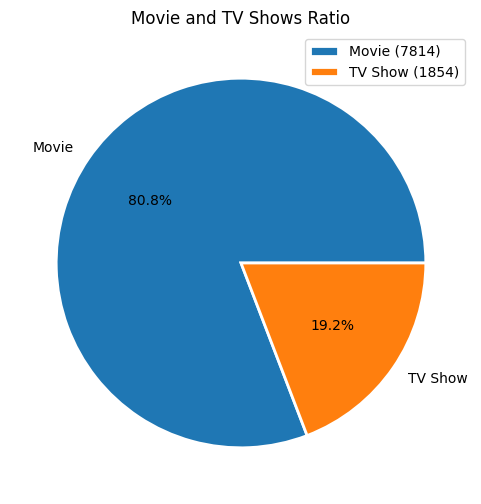

In [14]:
df_pie = dfv['type'].copy().value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    x=df_pie.values,labels=df_pie.index,autopct='%.1f%%',
    wedgeprops={'linewidth':2.0,'edgecolor':'white'}
    )
plt.title('Movie and TV Shows Ratio')
plt.legend(labels=[f"{label} ({count})" for label, count in zip(df_pie.index, df_pie.values)],loc='best')
plt.show()

> The chart above shows that movies are the most common type of show on amazon prime. 

**Distribution of Movie and Tv Shows per 10 Year**

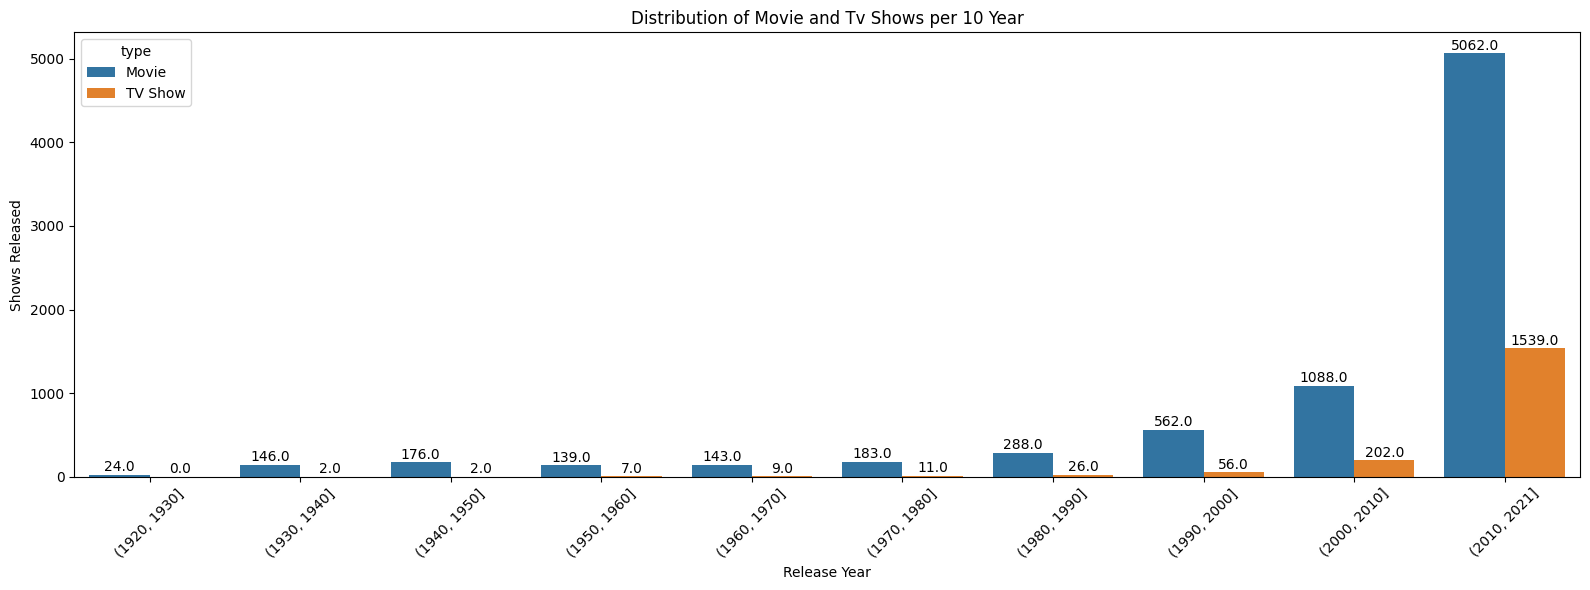

In [15]:
fig =plt.figure(figsize=(16,6))
# Create bins for countplot
bins = []
for i in range(1920,2022,10):
    if(i==2020):
        i = 2021
    bins.append(i)
df_count = dfv[['type','release_year']].copy()
df_count.loc[:,'release_year_bins'] = pd.cut(df_count['release_year'],bins)

ax = sns.countplot(data=df_count,x='release_year_bins',hue='type',width=0.8)
plt.xticks(rotation=45)
plt.title('Distribution of Movie and Tv Shows per 10 Year')
plt.ylabel('Shows Released')
plt.xlabel('Release Year')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2. , height + 5, height, ha='center',va='bottom')
fig.set_tight_layout(True)
plt.show()


> The chart shows that most content on the Amazon Prime is released between 2010-2021

**Distribution of Shows Rating**

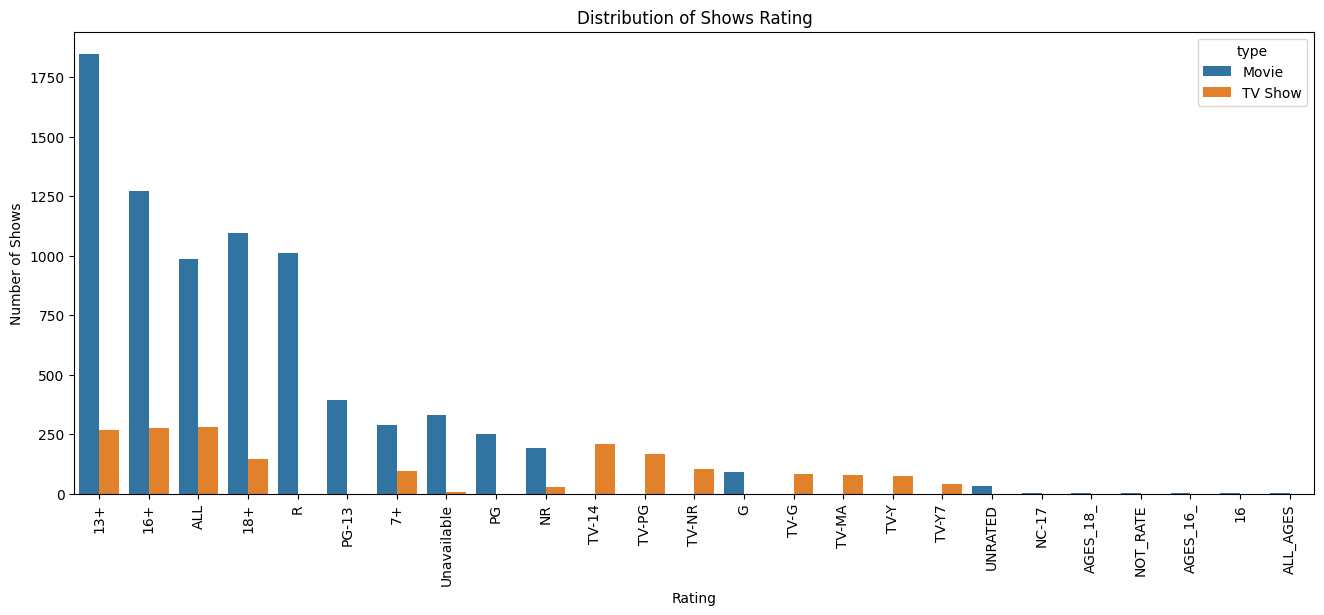

In [16]:
df_count1 = dfv['rating'].value_counts().reset_index()
plt.figure(figsize=(16,6))
sns.countplot(x='rating', data=dfv,hue='type', order=dfv['rating'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Shows Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Shows')
plt.show()

> According to the chart, the majority of movies on Amazon Prime are rated for viewers aged 13 and above. However, for TV shows, the ratings vary between '13+', '16+', or 'All'.

**Shows Categories Available in Amazon Prime**

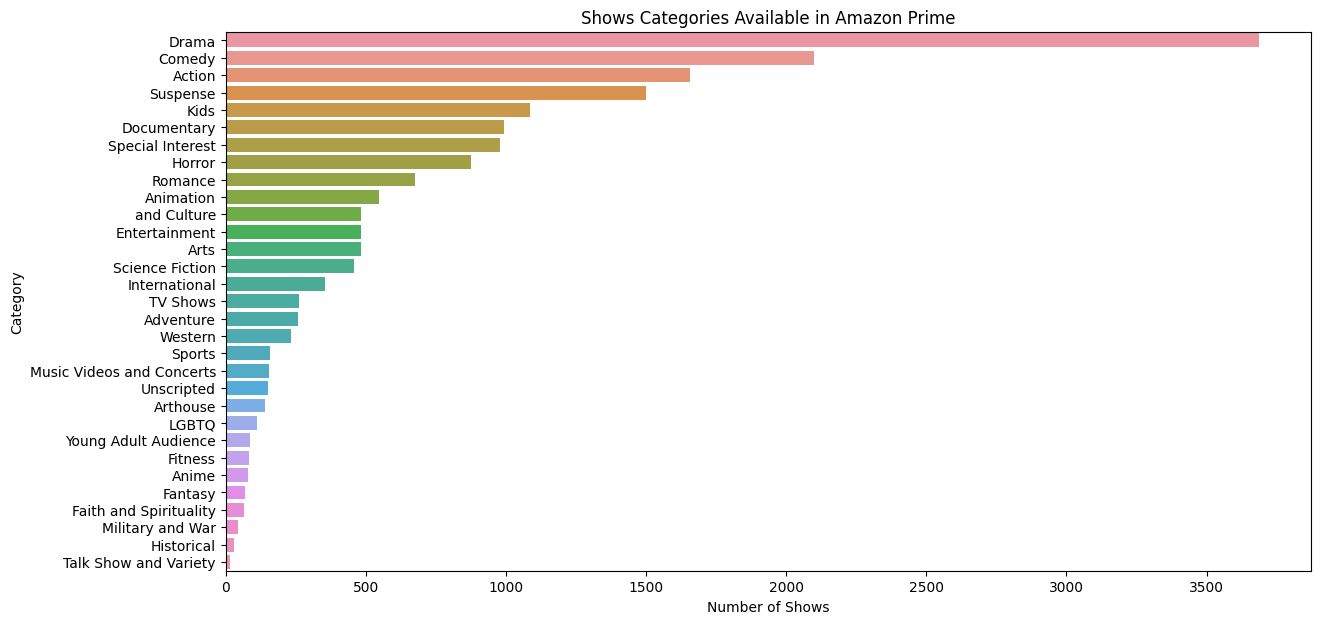

In [17]:
df_barh = dfv['listed_in'].str.split(', ').explode().value_counts()
plt.figure(figsize=(14,7))
sns.barplot(y=df_barh.index,x=df_barh.values,orient='horizontal')
plt.ylabel('Category')
plt.xlabel('Number of Shows')
plt.title('Shows Categories Available in Amazon Prime')
plt.show()

> According to this data, it seems that Drama is the most common category whereas Talk Show and Variety is the least common category in Amazon Prime.


**Top 10 Duration and Seasons of each shows type**

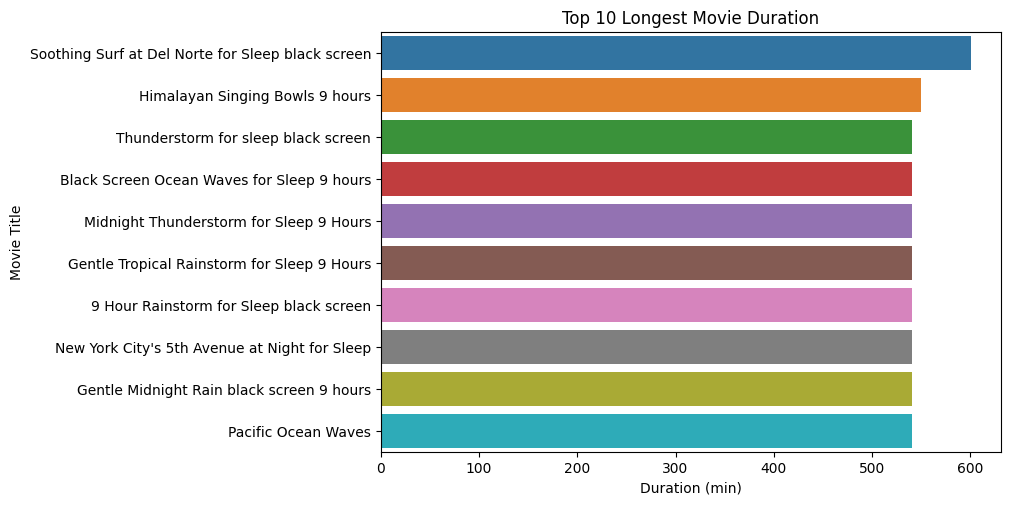

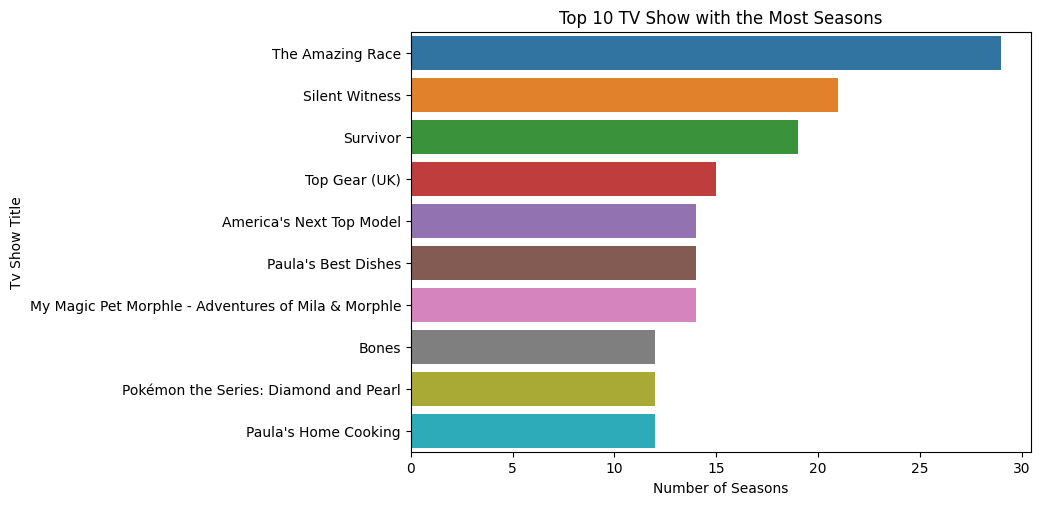

In [18]:
# new variable for movie & tv show
df_bar_mov = dfv[dfv['type']=='Movie'].copy()
df_bar_tv = dfv[dfv['type']=='TV Show'].copy()

df_bar_mov['duration_num'] = df_bar_mov.duration.str.split().str[0].astype('Int64')
df_bar_tv['duration_num'] = df_bar_tv.duration.str.split().str[0].astype('Int64')

df_bar_mov = df_bar_mov[['title','duration_num']].sort_values('duration_num',ascending=False)
df_bar_tv = df_bar_tv[['title','duration_num']].sort_values('duration_num',ascending=False)


plt.figure(figsize=(8,12))
plt.subplot(2,1,1)
sns.barplot(data=df_bar_mov.head(10),y='title',x='duration_num',orient='horizontal')
plt.title('Top 10 Longest Movie Duration')
plt.xlabel('Duration (min)')
plt.ylabel('Movie Title')
plt.show()

plt.figure(figsize=(8,12))
plt.subplot(2,1,2)
sns.barplot(data=df_bar_tv.head(10),y='title',x='duration_num',orient='horizontal')
plt.title('Top 10 TV Show with the Most Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Tv Show Title')
plt.show()

> From the first chart we can conclude that most of the longest 'Movies' are 9 hours long which are mostly ambient videos

> According to the second chart, The Amazing Race holds the top spot for the TV show with the most seasons, boasting 29 seasons.

## Conclusion

* Most of the content on Amazon Prime is Movie
* Over 50% of the content available on Amazon Prime has been released between the years 2010 and 2021
* Majority of movies are '13+' rated. As for TV shows' ratings vary between '13+', '16+', or 'All.'
* The most common category/genre on Amazon Prime is Drama, with over 3500 shows
* Most of the longest-duration movies are ambient videos with 9 hours long
* Tv show with the most season is The Amazing Race, with 29 seasons 

## Author Information
This analysis was conducted by Muhammad Attila An Naufal, a computer science student and an aspiring data analyst with a great passion for learning the world of data analysis. Connect with Attila on [LinkedIn](https://www.linkedin.com/in/attilanaufal/) for further discussions and collaborations.

---
Note: Please feel free to provide any feedback or suggestions on this analysis. Your input is highly appreciated!